<div style="text-align: center; font-size: 28px">Boston Marathon Analysis </div>
Team Members:
<div style="text-align: left; font-size: 12px">    Karthik Sunil </div>
<div style="text-align: left; font-size: 12px">    Parth Trivedi </div>
<div style="text-align: left; font-size: 12px">    Meghana Bangalore Srikantha </div>
<div style="text-align: left; font-size: 12px">    Pooja Kuberaiah </div>



In [2]:
!pwd

/Users/karthik/Downloads/boston-marathon-analysis-main


In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_2015 = pd.read_csv("marathon_results_2015.csv")
df_2016 = pd.read_csv("marathon_results_2016.csv")
df_2017 = pd.read_csv("marathon_results_2017.csv")
df_2018 = pd.read_csv("marathon_results_2018.csv")

In [5]:
df_2015 = df_2015.drop(['Unnamed: 0', 'Bib','Unnamed: 9','Citizen','Proj Time'], axis = 'columns')
df_2015.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [6]:
df_2016 = df_2016.drop(['Bib','Unnamed: 8','Citizen','Proj Time'], axis = 'columns')
df_2016.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [7]:
df_2017 = df_2017.drop(['Unnamed: 0','Bib','Unnamed: 9','Citizen','Proj Time'], axis = 'columns')
df_2017.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [8]:
df_2018.columns
df_2018 = df_2018.drop(['Unnamed: 0.1','Unnamed: 0','Bib','Citizen', 'Blank','Proj. Time'], axis = 'columns')
df_2018.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [9]:
print(df_2015.info())
print(df_2016.info())
print(df_2017.info())
print(df_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           26598 non-null  object
 1   Age            26598 non-null  int64 
 2   M/F            26598 non-null  object
 3   City           26598 non-null  object
 4   State          24047 non-null  object
 5   Country        26598 non-null  object
 6   5K             26598 non-null  object
 7   10K            26598 non-null  object
 8   15K            26598 non-null  object
 9   20K            26598 non-null  object
 10  Half           26598 non-null  object
 11  25K            26598 non-null  object
 12  30K            26598 non-null  object
 13  35K            26598 non-null  object
 14  40K            26598 non-null  object
 15  Pace           26598 non-null  object
 16  Official Time  26598 non-null  object
 17  Overall        26598 non-null  int64 
 18  Gender         26598 non-n

In [10]:
common_names = set(df_2015['Name']).intersection(set(df_2016['Name']))
df1_common = df_2015[df_2015['Name'].isin(common_names)]
df1_common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 26591
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           5555 non-null   object
 1   Age            5555 non-null   int64 
 2   M/F            5555 non-null   object
 3   City           5555 non-null   object
 4   State          5349 non-null   object
 5   Country        5555 non-null   object
 6   5K             5555 non-null   object
 7   10K            5555 non-null   object
 8   15K            5555 non-null   object
 9   20K            5555 non-null   object
 10  Half           5555 non-null   object
 11  25K            5555 non-null   object
 12  30K            5555 non-null   object
 13  35K            5555 non-null   object
 14  40K            5555 non-null   object
 15  Pace           5555 non-null   object
 16  Official Time  5555 non-null   object
 17  Overall        5555 non-null   int64 
 18  Gender         5555 non-nul

In [11]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [12]:
test_df = pd.concat([df_2015, df_2016, df_2017, df_2018])
test_df.loc[~test_df['Country'].isin(['USA','CAN']), 'State'] = 'N/A'
test_df = test_df.drop(['Overall', 'Gender', 'Division'], axis='columns')
columns = ['5K','10K','15K','20K','Half','25K','30K','35K','40K','Pace','Official Time']
test_df[columns] = test_df[columns]

In [13]:
time_columns = ['5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace','Official Time']

test_df.replace('-','00:00:00', inplace=True)

#test_df['5K','10K'] = pd.to_datetime(test_df['5K'], format='%H:%M:%S').dt.time

def strTimeToMinutes(timestr):
    time_split = timestr.split(':')
    hours = int(time_split[0])
    minutes = int(time_split[1])
    seconds = int(time_split[2])
    time = hours*60 + minutes + seconds/60
    return time

for time in time_columns:
    test_df[time] = test_df[time].apply(lambda x: strTimeToMinutes(x))



In [14]:
test_df.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year
0,"Desisa, Lelisa",25,M,Ambo,N/A,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,N/A,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015
2,"Chebet, Wilson",29,M,Marakwet,N/A,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015
3,"Kipyego, Bernard",28,M,Eldoret,N/A,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015
4,"Korir, Wesley",32,M,Kitale,N/A,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': '5K'}>,
        <AxesSubplot: title={'center': '10K'}>,
        <AxesSubplot: title={'center': '15K'}>],
       [<AxesSubplot: title={'center': '20K'}>,
        <AxesSubplot: title={'center': 'Half'}>,
        <AxesSubplot: title={'center': '25K'}>,
        <AxesSubplot: title={'center': '30K'}>],
       [<AxesSubplot: title={'center': '35K'}>,
        <AxesSubplot: title={'center': '40K'}>,
        <AxesSubplot: title={'center': 'Pace'}>,
        <AxesSubplot: title={'center': 'Official Time'}>],
       [<AxesSubplot: title={'center': 'Year'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

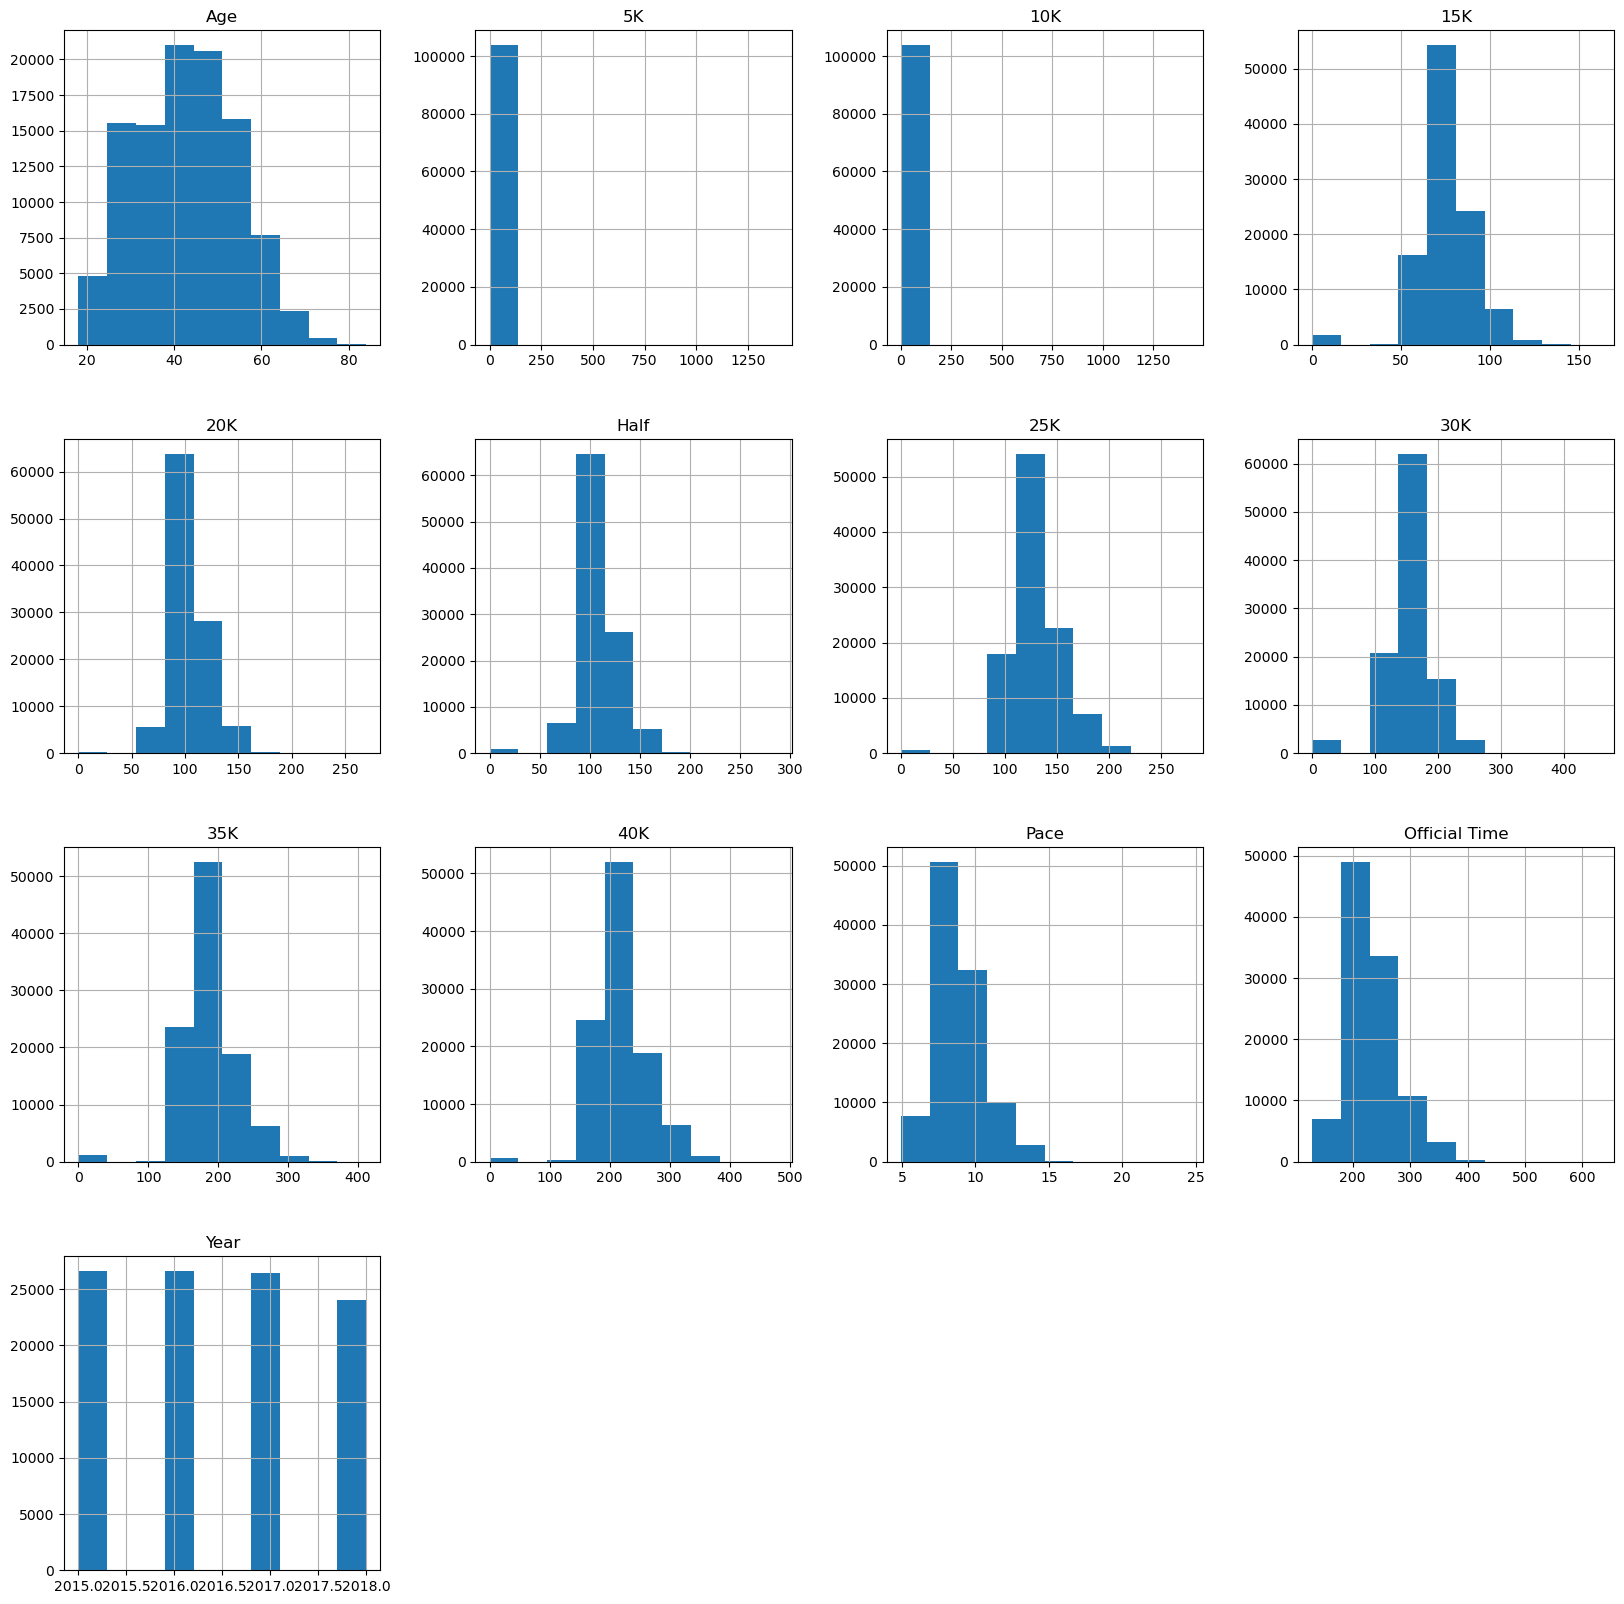

In [15]:
test_df.hist(figsize=(20,20))

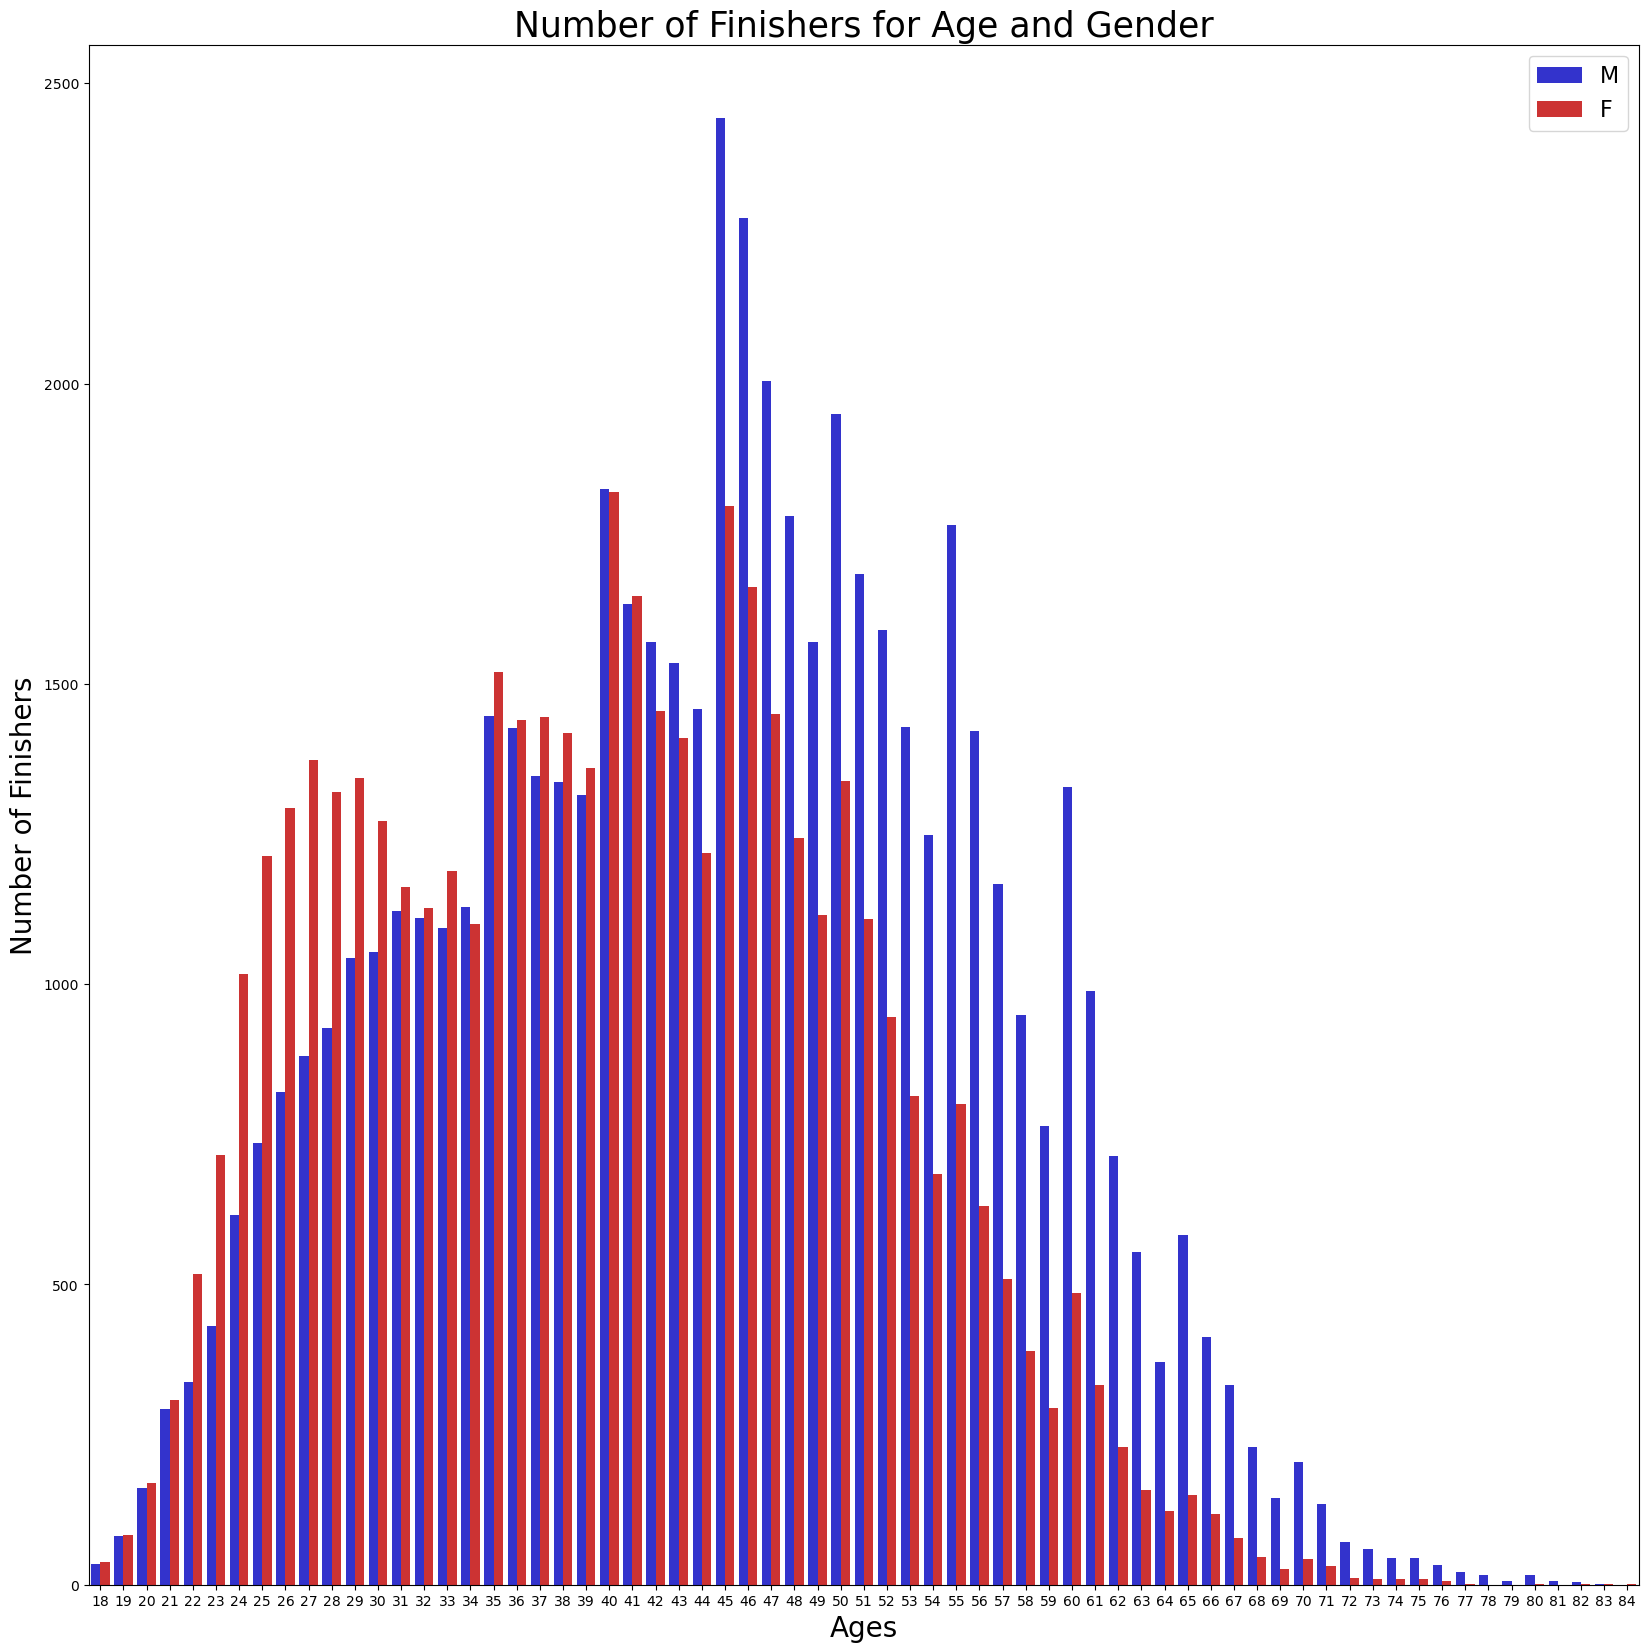

In [16]:
plt.figure(figsize=(20,20))
d = sns.countplot(x='Age', hue='M/F', data=test_df, palette={'F':'r','M':'b'}, saturation=0.6)
d.set_title('Number of Finishers for Age and Gender', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of Finishers',fontdict={'size':20})
d.legend(fontsize=16)
plt.show()

In [17]:
test_df.rename(columns={'M/F': 'Gender'}, inplace=True)

In [18]:
test_df

,Name,Age,Gender,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year
0,"Desisa, Lelisa",25,M,Ambo,N/A,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,N/A,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015
2,"Chebet, Wilson",29,M,Marakwet,N/A,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015
3,"Kipyego, Bernard",28,M,Eldoret,N/A,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015
4,"Korir, Wesley",32,M,Kitale,N/A,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24082,"Puckett, Steve",70,M,Dallas,TX,USA,30.766667,62.683333,94.100000,126.983333,134.050000,160.983333,0.000000,234.216667,0.000000,11.100000,290.650000,2018
24083,"Boyers, William",71,M,Garden Ridge,TX,USA,29.983333,60.666667,92.966667,125.766667,132.783333,160.450000,196.800000,235.600000,279.983333,11.366667,297.950000,2018
24084,"Lastimosa, Augusto",70,M,Fort Worth,TX,USA,32.300000,68.050000,101.050000,138.816667,146.316667,173.816667,210.950000,250.866667,292.633333,11.933333,312.516667,2018
24085,"Thompson, Susan",71,F,Sugar Land,TX,USA,35.083333,77.150000,116.650000,158.350000,167.266667,200.750000,245.666667,293.116667,337.883333,13.633333,357.316667,2018


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

print(test_df.head())

print(test_df['Gender'].unique())

print(test_df['Age'].unique())

print(test_df['Country'].unique())

print(test_df.describe())


                    Name  Age Gender         City State Country         5K  \
0         Desisa, Lelisa   25      M         Ambo   N/A     ETH  14.716667   
1  Tsegay, Yemane Adhane   30      M  Addis Ababa   N/A     ETH  14.716667   
2         Chebet, Wilson   29      M     Marakwet   N/A     KEN  14.716667   
3       Kipyego, Bernard   28      M      Eldoret   N/A     KEN  14.716667   
4          Korir, Wesley   32      M       Kitale   N/A     KEN  14.716667   

         10K        15K        20K       Half        25K        30K  \
0  29.716667  44.950000  60.483333  64.033333  76.116667  92.000000   
1  29.716667  44.966667  60.466667  64.016667  76.116667  91.983333   
2  29.716667  44.950000  60.483333  64.033333  76.116667  92.000000   
3  29.733333  45.016667  60.483333  64.033333  76.116667  92.000000   
4  29.733333  44.966667  60.466667  64.016667  76.116667  92.000000   

          35K         40K      Pace  Official Time  Year  
0  107.983333  122.650000  4.933333     129.2

               5K        10K        15K         20K        Half         25K  \
Gender                                                                        
F       26.611053  53.463374  79.997788  109.036582  114.101546  137.424020   
M       24.139966  48.332990  71.895509   98.494426  103.134823  124.052142   

               30K         35K         40K      Pace  Official Time  
Gender                                                               
F       164.462428  197.456851  229.340887  9.319829     244.139170  
M       148.201910  179.296895  209.477446  8.556420     224.118271  


/var/folders/n2/5bhxdj5j3zjfqks4jb070q4w0000gn/T/ipykernel_94986/1762488070.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = test_df.groupby('Gender').mean()[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]


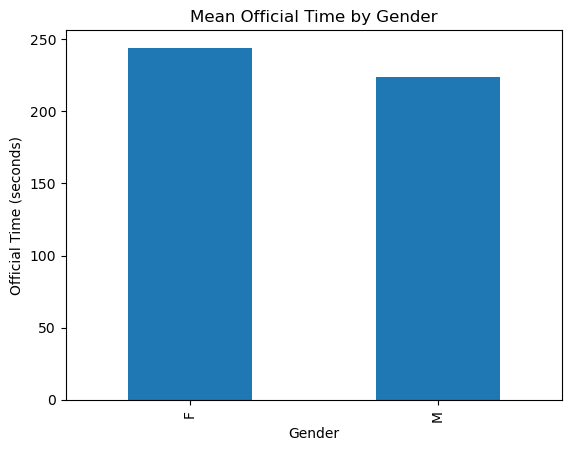

In [20]:

gender_group = test_df.groupby('Gender').mean()[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]

print(gender_group)

gender_group.plot(kind='bar', y='Official Time', legend=False)
plt.title('Mean Official Time by Gender')
plt.ylabel('Official Time (seconds)')
plt.show()


            5K        10K         15K         20K        Half         25K  \
Age                                                                         
18   27.536343  55.103241   82.411574  111.137731  117.219213  142.807639   
19   25.076321  50.050000   75.142581  102.496646  107.411890  130.192886   
20   24.449496  49.058862   73.393706  100.134038  104.785901  126.657805   
21   24.454528  49.298361   73.279667  100.111500  104.828278  126.365139   
22   25.063271  50.254391   74.747112  102.282514  107.162451  129.169457   
..         ...        ...         ...         ...         ...         ...   
80   30.575490  62.391176   95.272549  129.525490  136.806863  164.683333   
81   31.408333  64.325000   97.291667  131.677778  139.244444  168.600000   
82   33.756667  68.006667  104.496667  142.523333  150.756667  180.730000   
83   31.644444  64.183333   97.516667  132.755556  140.466667  169.227778   
84   36.683333  77.433333  119.233333  162.000000  171.366667  205.333333   

/var/folders/n2/5bhxdj5j3zjfqks4jb070q4w0000gn/T/ipykernel_94986/1427649901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_group = test_df.groupby('Age').mean()[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]


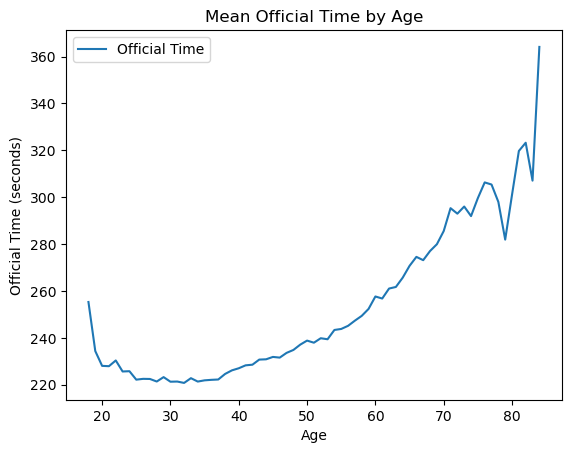

In [21]:
age_group = test_df.groupby('Age').mean()[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]

print(age_group)

age_group.plot(kind='line', y='Official Time')
plt.title('Mean Official Time by Age')
plt.ylabel('Official Time (seconds)')
plt.show()


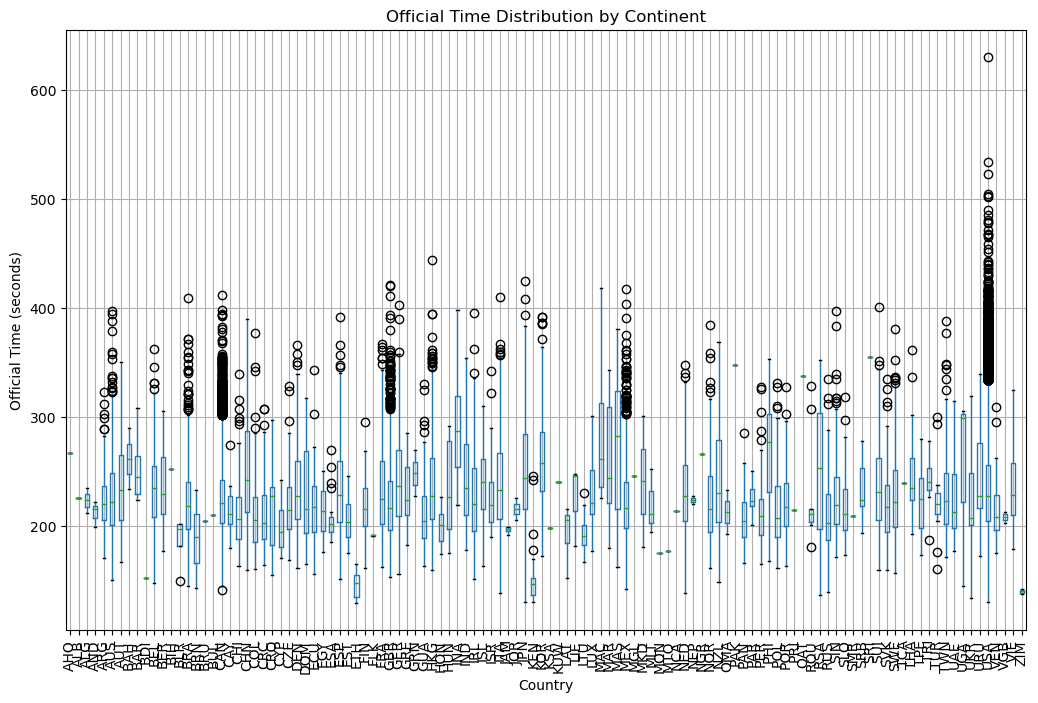

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

test_df.boxplot(column='Official Time', by='Country', figsize=(12,8))
plt.title('Official Time Distribution by Continent')
plt.suptitle('')
plt.ylabel('Official Time (seconds)')
plt.xticks(rotation=90)
plt.show()




'ETH' 'KEN' 'USA' 'UKR' 'RSA' 'ITA' 'RUS' 'JPN' 'CAN' 'BEL' 'NZL' 'BLR'
 'AUS' 'GBR' 'CRO' 'ECU' 'GER' 'ESP' 'SWE' 'BRA' 'HKG' 'MEX' 'DEN' 'MAS'
 'IRL' 'ISL' 'CHI' 'GUA' 'FIN' 'SVK' 'COL' 'SUI' 'CHN' 'AUT' 'NED' 'FRA'
 'CRC' 'CYP' 'POL' 'NOR' 'KOR' 'POR' 'TPE' 'PER' 'SIN' 'PAN' 'VEN' 'LUX'
 'CZE' 'VIE' 'MAR' 'BER' 'ROU' 'IND' 'LIE' 'ARG' 'ESA' 'DOM' 'ISR' 'GRE'
 'SLO' 'LTU' 'URU' 'CAY' 'EST' 'JAM' 'UAE' 'VGB' 'TUR' 'LAT' 'AND' 'OMA'
 'BAH' 'TRI' 'INA' 'AHO' 'PHI' 'UGA' 'QAT' 'ZIM' 'TWN' 'HON' 'FLK' 'HUN'
 'JOR' 'ALB' 'SRB' 'PAK' 'BRN' 'BDI' 'EGY' 'THA' 'MLT' 'KSA' 'SMR' 'BUL'
 'ALG' 'NCA' 'BAR' 'GRN' 'PAR' 'TCA' 'KUW' 'MGL' 'NGR'

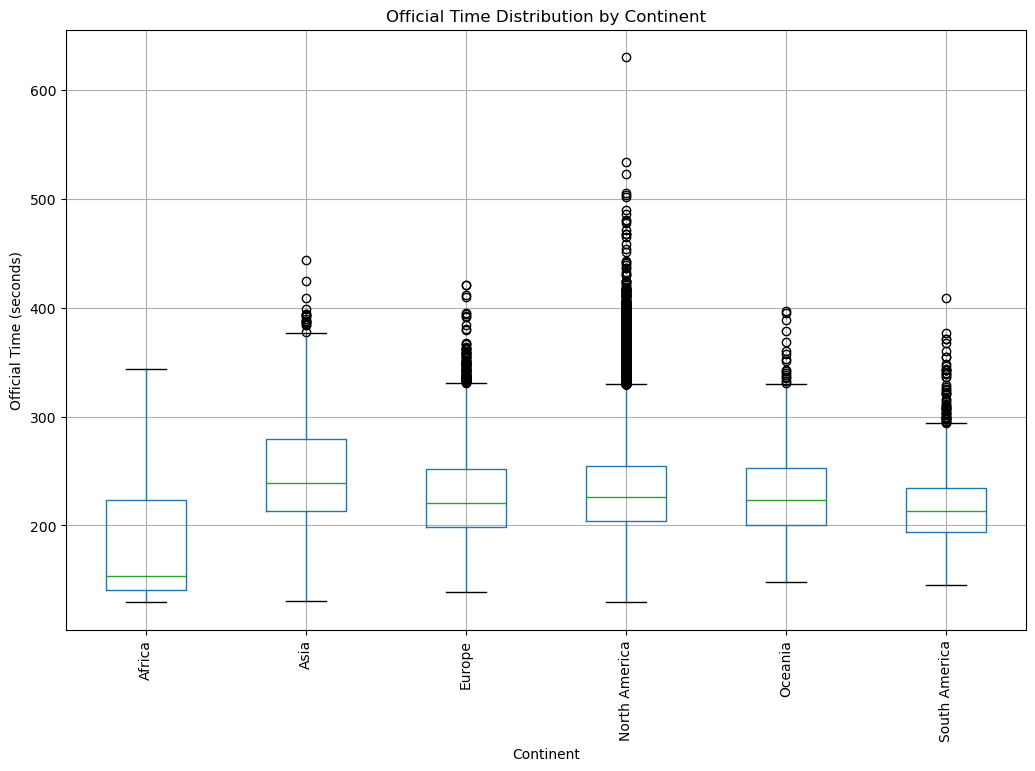

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

continent_map = {'North America': ['USA', 'CAN', 'MEX'],
                 'South America': ['BRA', 'ECU', 'PER', 'CHI', 'ARG', 'VEN', 'COL', 'ESA', 'URU', 'PAR', 'BAR', 'GRN'],
                 'Europe': ['ITA', 'UK', 'CHE', 'ESP', 'IRL', 'FRA', 'NLD', 'SWE', 'DNK', 'NOR', 'FIN', 'BEL', 'AUT', 'POL', 'PRT', 'RUS', 'CZE', 'HUN', 'GRC', 'ROU', 'GBR', 'CRO', 'BLR', 'ISR', 'ISL', 'CYP', 'LIE', 'SLO', 'LTU', 'EST', 'LUX', 'LAT', 'AND', 'SRB', 'ALB', 'SMR', 'BUL'],
                 'Africa': ['KEN', 'ETH', 'ZAF', 'MAR', 'UGA', 'NGR', 'BDI', 'ZIM', 'ALG'],
                 'Asia': ['JPN', 'CHN', 'KOR', 'TWN', 'HKG', 'SGP', 'THA', 'PHL', 'IND', 'QAT', 'ARE', 'JOR', 'LBN', 'BHR', 'OMN', 'KWT', 'IRN', 'VIE', 'PAK', 'BRN', 'INA', 'TUR', 'KSA', 'KAZ', 'KGZ', 'UZB'],
                 'Oceania': ['AUS', 'NZL']}

country_to_continent = {}
for continent, countries in continent_map.items():
    for country in countries:
        country_to_continent[country] = continent

test_df['Continent'] = test_df['Country'].map(country_to_continent)

test_df.boxplot(column='Official Time', by='Continent', figsize=(12,8))
plt.title('Official Time Distribution by Continent')
plt.suptitle('')
plt.ylabel('Official Time (seconds)')
plt.xticks(rotation=90)
plt.show()




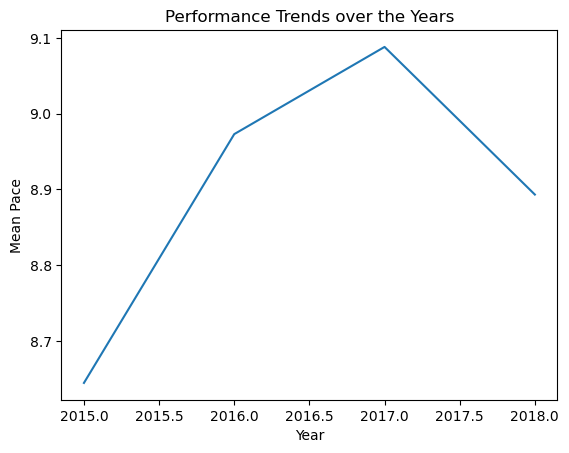

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by year and calculate the mean pace for each year
mean_pace_by_year = test_df.groupby('Year')['Pace'].mean()

# Plot the mean pace by year
plt.plot(mean_pace_by_year.index, mean_pace_by_year.values)
plt.xlabel('Year')
plt.ylabel('Mean Pace')
plt.title('Performance Trends over the Years')
plt.show()


In [50]:
# Group the data by Name and count the number of unique years for each runner
runner_years = test_df.groupby(['Name'])['Year'].nunique()

# Filter out the runners who appear in less than 4 years
common_runners = runner_years[runner_years == 4].index.tolist()

# Print the list of common runners
# print(common_runners)

common_df = test_df[test_df['Name'].isin(common_runners)]

common_df

# common_df.to_csv('filename.csv', index=False)


,Name,Age,Gender,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year,Continent
86,"Ohara, Chip",34,1,Auburn,NY,USA,17.200000,34.400000,51.816667,69.366667,73.133333,86.783333,104.666667,123.100000,141.783333,5.733333,150.283333,2015,North America
120,"Vangampleare, Stephen",24,1,Colorado Springs,CO,USA,18.116667,36.350000,54.483333,72.433333,76.333333,90.350000,108.566667,127.000000,145.416667,5.850000,153.366667,2015,North America
126,"Ash, Alan",23,1,Atmore,AL,USA,18.416667,36.683333,54.983333,73.350000,77.383333,91.700000,110.316667,128.650000,146.283333,5.866667,153.783333,2015,North America
153,"Donaghy, Roger",36,1,Melrose,MA,USA,18.733333,37.233333,55.950000,74.700000,78.783333,93.300000,111.983333,130.583333,148.250000,5.950000,155.916667,2015,North America
160,"Autrey, Jonathan",32,1,Memphis,TN,USA,18.316667,36.716667,55.266667,73.583333,77.616667,91.900000,110.433333,129.183333,147.650000,5.966667,156.066667,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24051,"Hermon, Maria",60,0,Buda,TX,USA,28.583333,58.150000,89.000000,120.700000,127.566667,156.233333,193.933333,233.600000,272.033333,11.050000,289.483333,2018,North America
24052,"Allen, Mac",60,1,Austin,TX,USA,26.466667,52.983333,80.066667,107.733333,113.733333,137.816667,173.716667,0.000000,286.216667,11.566667,302.916667,2018,North America
24068,"Jayson, Stephen",65,1,Cherokee,TX,USA,25.383333,51.050000,80.483333,108.766667,115.083333,142.683333,177.616667,215.633333,248.350000,10.016667,262.350000,2018,North America
24069,"Rusch, Dorothy",68,0,Victoria,TX,USA,28.466667,57.516667,87.633333,118.683333,125.516667,150.666667,183.900000,217.633333,249.700000,10.083333,264.083333,2018,North America


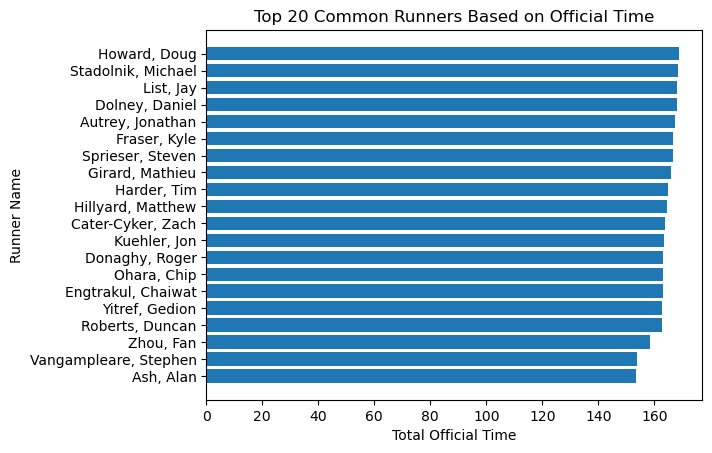

In [51]:

# Get the top 20 runners based on official time
top_20 = common_df.groupby('Name')['Official Time'].mean().sort_values(ascending=True).head(20)

# Plot a horizontal bar chart
plt.barh(top_20.index, top_20.values)
plt.xlabel('Total Official Time')
plt.ylabel('Runner Name')
plt.title('Top 20 Common Runners Based on Official Time')
plt.show()


In [25]:
test_df.drop(['Name'], axis=1)

,Age,Gender,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year,Continent
0,25,M,Ambo,N/A,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015,Africa
1,30,M,Addis Ababa,N/A,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015,Africa
2,29,M,Marakwet,N/A,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015,Africa
3,28,M,Eldoret,N/A,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015,Africa
4,32,M,Kitale,N/A,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24082,70,M,Dallas,TX,USA,30.766667,62.683333,94.100000,126.983333,134.050000,160.983333,0.000000,234.216667,0.000000,11.100000,290.650000,2018,North America
24083,71,M,Garden Ridge,TX,USA,29.983333,60.666667,92.966667,125.766667,132.783333,160.450000,196.800000,235.600000,279.983333,11.366667,297.950000,2018,North America
24084,70,M,Fort Worth,TX,USA,32.300000,68.050000,101.050000,138.816667,146.316667,173.816667,210.950000,250.866667,292.633333,11.933333,312.516667,2018,North America
24085,71,F,Sugar Land,TX,USA,35.083333,77.150000,116.650000,158.350000,167.266667,200.750000,245.666667,293.116667,337.883333,13.633333,357.316667,2018,North America


In [26]:
test_df['Gender'] = test_df['Gender'].map({'M': 1, 'F': 0})

In [27]:
test1_df = test_df.drop(['Name', 'City', 'State', 'Country', 'Continent'], axis=1)

In [28]:
test1_df

,Age,Gender,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year
0,25,1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015
1,30,1,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015
2,29,1,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015
3,28,1,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015
4,32,1,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24082,70,1,30.766667,62.683333,94.100000,126.983333,134.050000,160.983333,0.000000,234.216667,0.000000,11.100000,290.650000,2018
24083,71,1,29.983333,60.666667,92.966667,125.766667,132.783333,160.450000,196.800000,235.600000,279.983333,11.366667,297.950000,2018
24084,70,1,32.300000,68.050000,101.050000,138.816667,146.316667,173.816667,210.950000,250.866667,292.633333,11.933333,312.516667,2018
24085,71,0,35.083333,77.150000,116.650000,158.350000,167.266667,200.750000,245.666667,293.116667,337.883333,13.633333,357.316667,2018


In [29]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# select only the 'Age' and 'Official Time' columns for outlier detection
X = test1_df[['Age', 'Official Time']]

# fit the isolation forest model
clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(X)

# get the predictions
y_pred = clf.predict(X)

# filter outliers and create cleaned data
cleaned_data = test1_df[y_pred == 1]

# print the number of outliers and clean data points
num_outliers = len(test1_df[y_pred == -1])
num_clean = len(cleaned_data)
print(f"Number of outliers: {num_outliers}")
print(f"Number of clean data points: {num_clean}")


Number of outliers: 25992
Number of clean data points: 77733


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_data.drop(['Official Time', 'Age'], axis=1), cleaned_data['Official Time'], test_size=0.2, random_state=42)

# Fit the linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model's performance using mean absolute error, mean squared error, and R-squared
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.1629410196939766
Mean Squared Error: 0.06960792983869074
R-squared: 0.9999022006092814


### Prediction Model to predict Official Time of a runner based on new runner's data

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# separate the features and target variable
X = cleaned_data.drop('Official Time', axis=1)
y = cleaned_data['Official Time']

# train a linear regression model
model = LinearRegression()
model.fit(X, y)

# make predictions on new data
new_data = pd.DataFrame({'Age': [25, 30], 
                         'Gender': [0, 1], 
                         '5K': [20.5, 18.9],
                         '10K': [41.2, 39.6],
                         '15K': [63.5, 61.9],
                         '20K': [86.2, 84.6],
                         'Half': [92.5, 89.3],
                         '25K': [108.4, 106.8],
                         '30K': [131.2, 129.6],
                         '35K': [153.5, 151.9],
                         '40K': [176.2, 174.6],
                         'Pace': [8, 8],
                          'Year':[2019, 2020]})
predictions = model.predict(new_data)
print(predictions)


[209.28653103 209.31079874]


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# separate the features and target variable
X = cleaned_data[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace']]
y = cleaned_data['Gender']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))


Accuracy: 0.6191680960548885
Precision: 0.6535098471847675
Recall: 0.6327741731286596
F1-score: 0.6429748743718592


/Users/karthik/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# separate the features and target variable
X = cleaned_data[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace']]
y = cleaned_data['Gender']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[3730 3358]
 [2980 5479]]


/Users/karthik/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define the values from the confusion matrix
y_true = [1]*8808 + [0]*7120 # 1 is female, 0 is male
y_pred = [1]*6659 + [0]*3049 + [1]*2149 + [0]*4071

# calculate the performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7301607232546459
Precision: 0.7560172570390554
Recall: 0.7560172570390554
F1-score: 0.7560172570390555


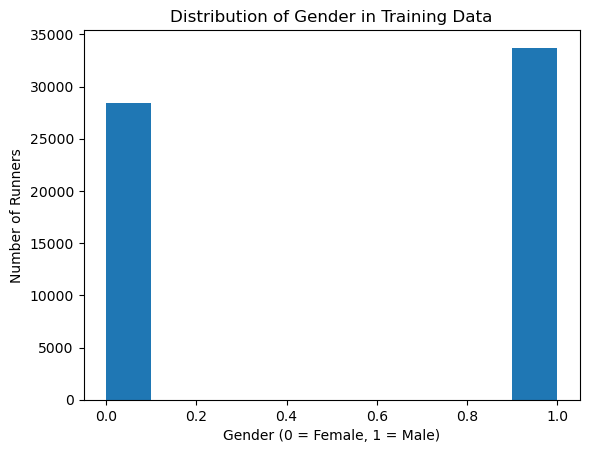

In [35]:
import matplotlib.pyplot as plt

# plot the distribution of the target variable in the training data
plt.hist(y_train)
plt.title('Distribution of Gender in Training Data')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Runners')
plt.show()


### Prediction Model to predict Gender of a runner based on new runner's data

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# separate the features and target variable
X = cleaned_data[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace']]
y = cleaned_data['Gender']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# evaluate the model
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f'Training accuracy: {train_acc}')
print(f'Testing accuracy: {test_acc}')

# make predictions on the new runner's split times
new_runner = pd.DataFrame({'5K': [34.5],
                           '10K': [68.2],
                           '15K': [101.5],
                           '20K': [134.2],
                           'Half': [142.5],
                           '25K': [169.4],
                           '30K': [200.2],
                           '35K': [237.5],
                           '40K': [272.2],
                           'Pace': [11]})
gender = model.predict(new_runner)[0]

# display the predicted gender of the new runner
if gender == 0:
    print('The predicted gender of the new runner is female.')
else:
    print('The predicted gender of the new runner is male.')
    
plt.show()


Training accuracy: 0.9996623034123436
Testing accuracy: 0.7173731266482279
The predicted gender of the new runner is female.


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split dataset into features (X) and target variable (y)
X = test1_df.iloc[:, :-1]
y = test1_df.iloc[:, -1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set
clf.fit(X_train, y_train)

# Predict age group of runners in the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.36604646678877856
Precision: 0.3653716724590169
Recall: 0.36604646678877856
F1-score: 0.36565064393029834


### Prediction Model to predict Age of a runner based on new runner's data

In [38]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# select features and target
X = test1_df[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K']]
y = test1_df['Age']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create decision tree classifier
classifier = DecisionTreeClassifier()

# train model
classifier.fit(X_train, y_train)

# make predictions on test set
y_pred = classifier.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1-score: {}".format(f1))

# predict age group for a new runner
new_runner = pd.DataFrame([[41, 78, 108, 156, 188, 210, 280, 320, 450]], columns=['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K'])
predicted_age_group = classifier.predict(new_runner)

print("Predicted age group for new runner: {}".format(predicted_age_group))


Accuracy: 0.0351409978308026
Precision: 0.035138725261471215
Recall: 0.0351409978308026
F1-score: 0.035083223050095515
Predicted age group for new runner: [48]


/Users/karthik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


t-statistic: -68.77662655814521
p-value: 0.0
Cohen's d: 0.42804857269951196


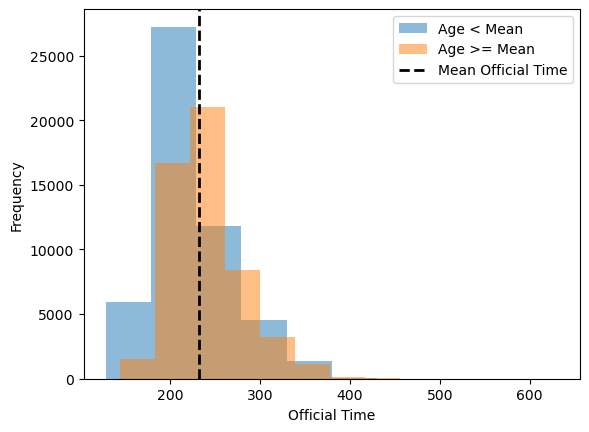

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# filter age groups with less than 100 runners
age_counts = test1_df['Age'].value_counts()
age_groups = age_counts[age_counts >= 100].index.tolist()
test1_df = test1_df[test1_df['Age'].isin(age_groups)]

# extract age and official time columns
age = test1_df['Age']
official_time = test1_df['Official Time']

# calculate means of age and official time
mean_age = age.mean()
mean_official_time = official_time.mean()

# split data into two groups based on age
age_below_mean = test1_df[age < mean_age]['Official Time']
age_above_mean = test1_df[age >= mean_age]['Official Time']

# perform t-test between two groups
t_stat, p_value = ttest_ind(age_below_mean, age_above_mean)

# print t-test results
print('t-statistic:', t_stat)
print('p-value:', p_value)

from math import sqrt

mean_diff = age_above_mean.mean() - age_below_mean.mean()
pooled_var = ((age_above_mean.var() * (len(age_above_mean) - 1)) + (age_below_mean.var() * (len(age_below_mean) - 1))) / (len(age_above_mean) + len(age_below_mean) - 2)
cohens_d = mean_diff / sqrt(pooled_var)

print("Cohen's d:", cohens_d)

# plot distributions of the two groups
plt.hist(age_below_mean, alpha=0.5, label='Age < Mean')
plt.hist(age_above_mean, alpha=0.5, label='Age >= Mean')
plt.axvline(mean_official_time, color='black', linestyle='dashed', linewidth=2, label='Mean Official Time')
plt.legend()
plt.xlabel('Official Time')
plt.ylabel('Frequency')
plt.show()


0         4.933333
1         4.966667
2         4.983333
3         5.000000
4         5.000000
           ...    
23677    10.933333
23678    11.150000
23679    11.233333
23680    11.500000
23681    11.516667
Name: Pace, Length: 51030, dtype: float64
29        5.533333
42        5.583333
151       5.950000
152       5.950000
188       6.016667
           ...    
24081    10.766667
24082    11.100000
24083    11.366667
24084    11.933333
24085    13.633333
Name: Pace, Length: 52250, dtype: float64
t-statistic: -68.7789374762109
p-value: 0.0
t = -68.779, p = 0.00000000


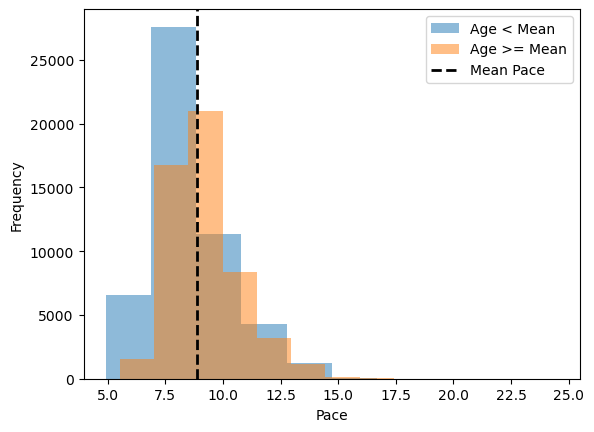

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# extract age and official time columns
age = test1_df['Age']
pace = test1_df['Pace']

# calculate means of age and official time
mean_age = age.mean()
mean_pace = pace.mean()

# split data into two groups based on age
age_below_mean = test1_df[age < mean_age]['Pace']
age_above_mean = test1_df[age >= mean_age]['Pace']

print(age_below_mean)
print(age_above_mean)

# perform t-test between two groups
t_stat, p_value = ttest_ind(age_below_mean, age_above_mean)

# print t-test results
print('t-statistic:', t_stat)
print('p-value:', p_value)

print("t = {:.3f}, p = {:.8f}".format(t_stat, p_value))

# plot distributions of the two groups
plt.hist(age_below_mean, alpha=0.5, label='Age < Mean')
plt.hist(age_above_mean, alpha=0.5, label='Age >= Mean')
plt.axvline(mean_pace, color='black', linestyle='dashed', linewidth=2, label='Mean Pace')
plt.legend()
plt.xlabel('Pace')
plt.ylabel('Frequency')
plt.show()

t-statistic: -79.71893465983064
p-value: 0.0


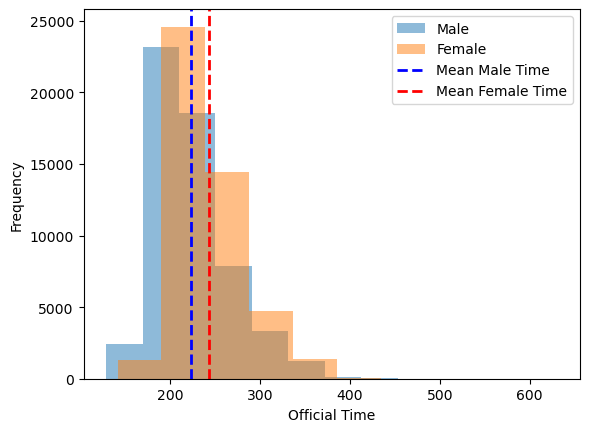

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# extract official time and gender columns
official_time = test1_df['Official Time']
gender = test1_df['Gender']

# split data into two groups based on gender
male_time = official_time[gender == 1]
female_time = official_time[gender == 0]

# perform t-test between two groups
t_stat, p_value = ttest_ind(male_time, female_time)

# print t-test results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# calculate means of male_time and female_time
mean_male_time = male_time.mean()
mean_female_time = female_time.mean()

# plot distributions of the two groups
plt.hist(male_time, alpha=0.5, label='Male')
plt.hist(female_time, alpha=0.5, label='Female')
plt.axvline(mean_male_time, color='blue', linestyle='dashed', linewidth=2, label='Mean Male Time')
plt.axvline(mean_female_time, color='red', linestyle='dashed', linewidth=2, label='Mean Female Time')
plt.legend()
plt.xlabel('Official Time')
plt.ylabel('Frequency')
plt.show()



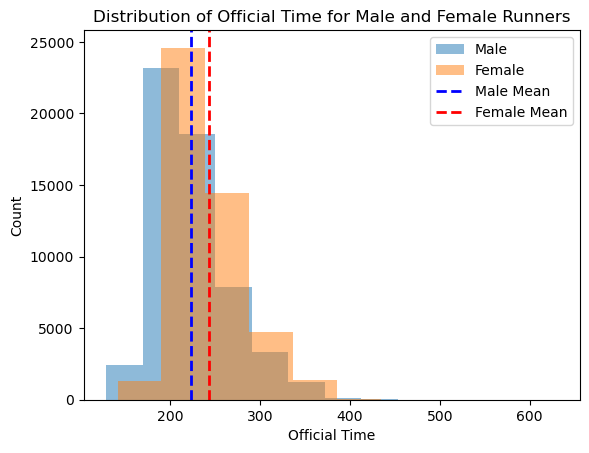

In [42]:
import matplotlib.pyplot as plt

# extract official time and gender columns
official_time = test1_df['Official Time']
gender = test1_df['Gender']

# split data into two groups based on gender
male_time = official_time[gender == 1]
female_time = official_time[gender == 0]

# calculate mean official time for male and female runners
mean_male_time = np.mean(male_time)
mean_female_time = np.mean(female_time)

# plot histogram of official times for male and female runners
plt.hist(male_time, alpha=0.5, label='Male')
plt.hist(female_time, alpha=0.5, label='Female')
plt.axvline(mean_male_time, color='blue', linestyle='dashed', linewidth=2, label='Male Mean')
plt.axvline(mean_female_time, color='red', linestyle='dashed', linewidth=2, label='Female Mean')
plt.legend()

plt.xlabel('Official Time')
plt.ylabel('Count')
plt.title('Distribution of Official Time for Male and Female Runners')
plt.show()


t-statistic: -79.71893465983064
p-value: 0.0
Cohen's d: -0.4985669273807845


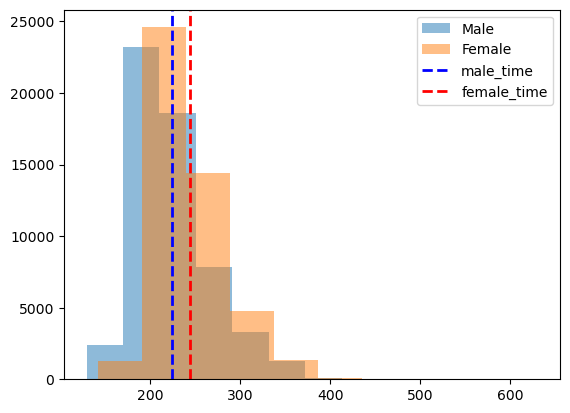

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# extract official time and gender columns
official_time = test1_df['Official Time']
gender = test1_df['Gender']

# split data into two groups based on gender
male_time = official_time[gender == 1]
female_time = official_time[gender == 0]

# perform t-test between two groups
t_stat, p_value = ttest_ind(male_time, female_time)

# calculate Cohen's d effect size
mean_male_time = np.mean(male_time)
mean_female_time = np.mean(female_time)
pooled_std = np.sqrt(((len(male_time)-1)*np.var(male_time)+(len(female_time)-1)*np.var(female_time))/(len(male_time)+len(female_time)-2))
cohens_d = (mean_male_time - mean_female_time) / pooled_std

# plot histograms of male and female official times
plt.hist(male_time, alpha=0.5, label='Male')
plt.hist(female_time, alpha=0.5, label='Female')
plt.axvline(mean_male_time, color='blue', linestyle='dashed', linewidth=2, label='male_time')
plt.axvline(mean_female_time, color='red', linestyle='dashed', linewidth=2, label='female_time')
plt.legend()

# print t-test and Cohen's d results
print('t-statistic:', t_stat)
print('p-value:', p_value)
print("Cohen's d:", cohens_d)


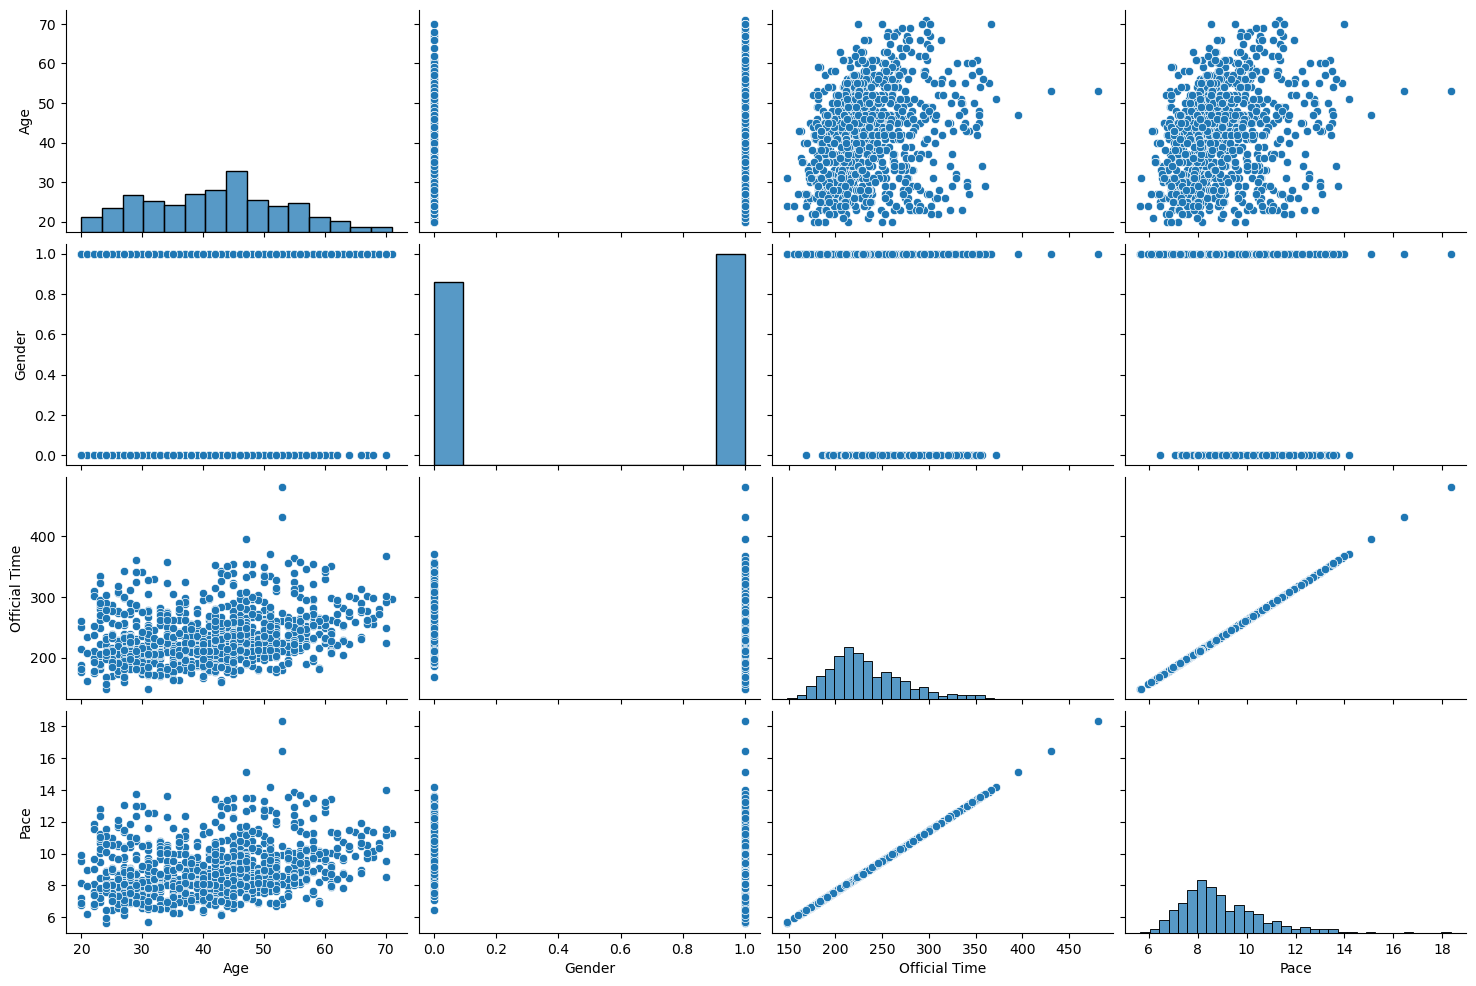

In [44]:
corr_test = test1_df[['Age', 'Gender', 'Official Time', 'Pace']].dropna().sample(1000)
sns.pairplot(corr_test, aspect=1.5);